**Grupo 1:
Andrea Morán Vargas
Pedro Vidal Orús

Datos reales de facturas de ventas de vehículos y repuestos convertidos en un Dataset_1 en formato csv

Proyecto: VeriFactura**

**Análisis Exploratorio de Datos**

Dado que actualmente no contamos con un dataset propiamente dicho, pues, en nuestro proyecto los datos se obtienen al extraer la información desde facturas emitidas de múltiples fuentes (etapa que está en construcción), hemos utilizado un Dataset, perteneciente a dos grupos con información definido: "COMPLETA" e "INCOMPLETA", el primero corresponde a facturas reales de Venta de Vehiculos y el segundo a facturas de repuestos con datos en su mayoría incompletos.

1. CARGA Y EXPLORACIÓN INICIAL

Manteniendo las instrucciones definidas iniciamos con la revisión de las tres primeras y últimas filas para familiarizarnos con la data.

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "/content/sample_data/DATASET_1.csv"

# Try reading the CSV with a semicolon delimiter
try:
    df = pd.read_csv(file_path, sep=';')
except ParserError:
    # If semicolon doesn't work, try with comma (default)
    df = pd.read_csv(file_path)


# Mostrar las primeras filas del dataset para familiarizarse
print("Primeras 3 filas del dataset:")
print(df.head(3))
# Mostrar las últimas filas del dataset para familiarizarse
print("Últimas 3 filas del dataset:")
print(df.tail(3))

Primeras 3 filas del dataset:
  FECHA_DOCUMENTO                                          DIRECCION  \
0      29/12/2023  Dir. Matriz: AVENIDA ATAHUALPA SN y RIO GUAYLL...   
1      21/10/2009  Av. de los Granados E11-67 y Las Hiedras, Quit...   
2       28/6/2021                             Av. Indoamerica Km 3 ½   

  MODELO_HOMOLOGADO_ANT  SUBSIDIO     AÑO  SUBTOTAL   CLASE    TOTAL  \
0                   NaN       NaN     NaN       NaN     NaN      NaN   
1                   NaN       NaN  2009.0  25810.96  CAMION  30400.0   
2                   NaN       NaN  2022.0  20535.71  CAMION  23000.0   

  CILINDRAJE                                        MODELO  ...       RUC  \
0        NaN                                           NaN  ...       NaN   
1  3900 C.C.                          HD72 CHASIS CABINADO  ...  1,79E+12   
2       2771  HOWO ZZ1047D3414C145 AC 2.8 2P 4X2 TM DIESEL  ...  1,89E+12   

  COMBUSTIBLE  EJES    TIPO      IVA  \
0         NaN   NaN     NaN      NaN   
1  

## INFORMACIÓN BÁSICA DEL DATASET FACTURAS

Como segundo paso, mostramos un resumen básico del DataFrame: Dimensiones, Tipos de datos, y resumen general

In [ ]:
# dimensión del Dataset
df.shape

(19, 30)

Como vemos el dataset "DATASET_1" se comopone de 19 filas y 30 columnas.

In [ ]:
# Tipos de datos de cada campo
print(df.dtypes)

FECHA_DOCUMENTO           object
DIRECCION                 object
MODELO_HOMOLOGADO_ANT     object
SUBSIDIO                 float64
AÑO                      float64
SUBTOTAL                 float64
CLASE                     object
TOTAL                    float64
CILINDRAJE                object
MODELO                    object
MODELO_REGISTRADO_SRI     object
RAMV_CPN                  object
RUEDAS                   float64
DESCUENTO                float64
NUMERO_FACTURA            object
COLOR                     object
MOTOR                     object
NOMBRE_CLIENTE            object
CAPACIDAD                 object
MARCA                     object
RUC                       object
COMBUSTIBLE               object
EJES                     float64
TIPO                      object
IVA                      float64
CONCESIONARIA             object
TONELAJE                 float64
VIN_CHASIS                object
PAIS_ORIGEN               object
ETIQUETA                  object
dtype: obj

Como se detalla en el bloque anterior existen 9 campos que contienen información numérica, los restantes son objetos.

In [ ]:
# Resumen de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FECHA_DOCUMENTO        19 non-null     object 
 1   DIRECCION              19 non-null     object 
 2   MODELO_HOMOLOGADO_ANT  3 non-null      object 
 3   SUBSIDIO               10 non-null     float64
 4   AÑO                    9 non-null      float64
 5   SUBTOTAL               18 non-null     float64
 6   CLASE                  8 non-null      object 
 7   TOTAL                  18 non-null     float64
 8   CILINDRAJE             7 non-null      object 
 9   MODELO                 10 non-null     object 
 10  MODELO_REGISTRADO_SRI  3 non-null      object 
 11  RAMV_CPN               6 non-null      object 
 12  RUEDAS                 4 non-null      float64
 13  DESCUENTO              8 non-null      float64
 14  NUMERO_FACTURA         18 non-null     object 
 15  COLOR   

In [ ]:
df.describe()

,SUBSIDIO,AÑO,SUBTOTAL,TOTAL,RUEDAS,DESCUENTO,EJES,IVA,TONELAJE
count,10.000000,9.000000,18.000000,18.000000,4.0,8.000000,4.0,18.000000,7.000000
mean,0.267000,2015.555556,10233.395000,11583.749444,4.0,300.223750,2.0,1169.402222,1.733571
std,0.844328,8.156456,12576.931531,14279.802916,0.0,689.592743,0.0,1530.761163,1.091806
min,0.000000,1998.000000,0.880000,0.990000,4.0,0.000000,2.0,0.000000,0.370000
25%,0.000000,2014.000000,41.997500,47.862500,4.0,0.000000,2.0,5.865000,1.250000
50%,0.000000,2016.000000,456.575000,517.350000,4.0,0.000000,2.0,60.775000,1.325000
75%,0.000000,2022.000000,19397.317500,21725.000000,4.0,109.375000,2.0,1912.890000,2.170000
max,2.670000,2025.000000,35086.840000,39999.000000,4.0,1964.290000,2.0,4912.160000,3.600000


Realizando el resumen estadístico básico, sin ningún tratamiento de los datos, vemos que se está tomanto el RUC como una cantidad y no como una identificación que es lo correcto. Así mismo, se observa que las variables: SUBSIDIO, RUEDAS Y EJES, mantienen valores nulos en más del 60% de sus registros, por lo que no deben considerarse en el análisis, pues no existen sificientes datos para realizar una imputación de los mismos.

In [ ]:
# --------------------------
# LIMPIEZA DE DATOS
# --------------------------

# 1. Verificar valores nulos en el dataset
print("Valores nulos en cada columna:")
print(df.isnull().sum())



Valores nulos en cada columna:
FECHA_DOCUMENTO           0
DIRECCION                 0
MODELO_HOMOLOGADO_ANT    16
SUBSIDIO                  9
AÑO                      10
SUBTOTAL                  1
CLASE                    11
TOTAL                     1
CILINDRAJE               12
MODELO                    9
MODELO_REGISTRADO_SRI    16
RAMV_CPN                 13
RUEDAS                   15
DESCUENTO                11
NUMERO_FACTURA            1
COLOR                    10
MOTOR                    12
NOMBRE_CLIENTE            1
CAPACIDAD                13
MARCA                    10
RUC                       1
COMBUSTIBLE               9
EJES                     15
TIPO                     10
IVA                       1
CONCESIONARIA             1
TONELAJE                 12
VIN_CHASIS               11
PAIS_ORIGEN              13
ETIQUETA                  0
dtype: int64


In [ ]:
# Manejo de valores nulos
# Eliminar la columna 'SUBSIDIO' ya que está completamente vacía
df.drop(columns=['SUBSIDIO'], inplace=True)
# Rellenar los valores nulos en 'EJES', 'RUEDAS' con 0
df.fillna({'EJES': 0, 'RUEDAS': 0}, inplace=True)

# Después de la limpieza, verificar nuevamente si hay valores nulos
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())




Valores nulos después de la limpieza:
FECHA_DOCUMENTO           0
DIRECCION                 0
MODELO_HOMOLOGADO_ANT    16
AÑO                      10
SUBTOTAL                  1
CLASE                    11
TOTAL                     1
CILINDRAJE               12
MODELO                    9
MODELO_REGISTRADO_SRI    16
RAMV_CPN                 13
RUEDAS                    0
DESCUENTO                11
NUMERO_FACTURA            1
COLOR                    10
MOTOR                    12
NOMBRE_CLIENTE            1
CAPACIDAD                13
MARCA                    10
RUC                       1
COMBUSTIBLE               9
EJES                      0
TIPO                     10
IVA                       1
CONCESIONARIA             1
TONELAJE                 12
VIN_CHASIS               11
PAIS_ORIGEN              13
ETIQUETA                  0
dtype: int64


In [ ]:
# Detección de valores duplicados
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")

# Eliminar duplicados si existen
df_cleaned = df.drop_duplicates()




Cantidad de filas duplicadas: 0


2. ## ANÁLISIS UNIVARIADO DE LAS VARIABLES MÁS RELEVANTES

Empezamos con las variables Numéricas

Se realiza la revisión de outliers Boxplot de Montos: Totales, Subtotales, IVA

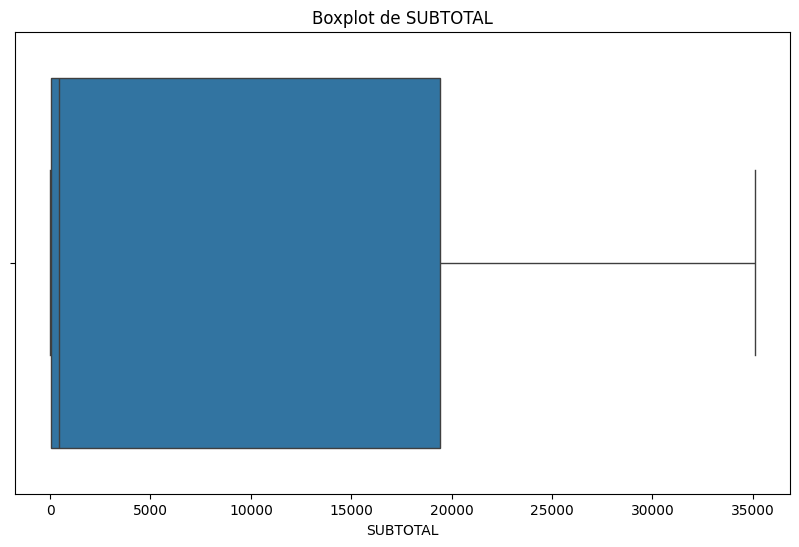

In [ ]:
# Verificación de valores atípicos (outliers) en 'SUBTOTAL'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['SUBTOTAL'])
plt.title('Boxplot de SUBTOTAL')
plt.show()

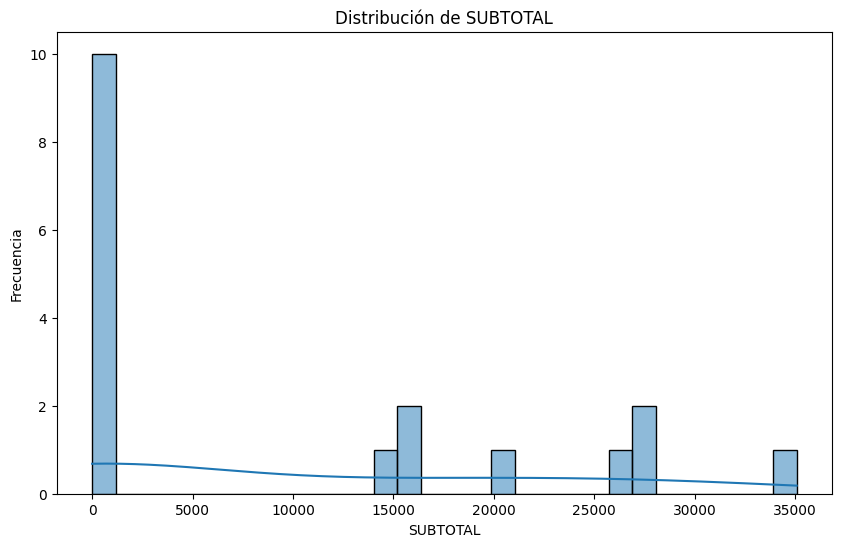

In [ ]:
# Distribución de la columna 'SUBTOTAL'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['SUBTOTAL'], bins=30, kde=True)
plt.title('Distribución de SUBTOTAL')
plt.xlabel('SUBTOTAL')
plt.ylabel('Frecuencia')
plt.show()

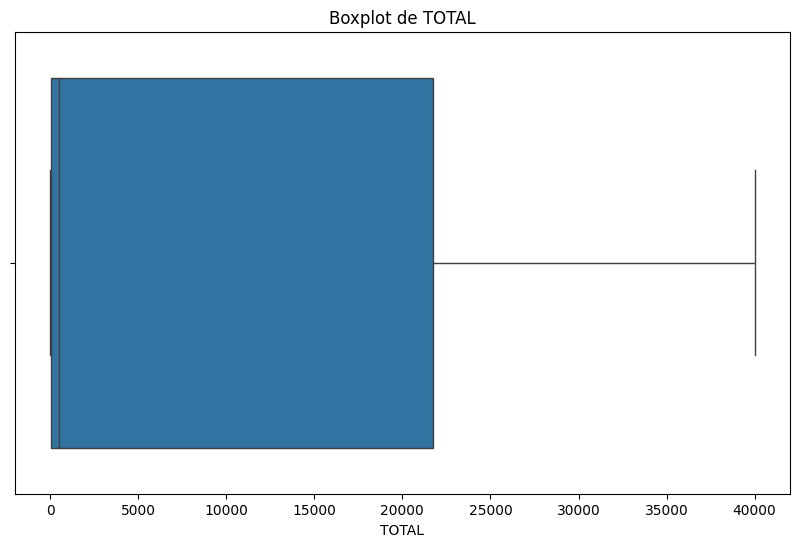

In [ ]:
# Verificación de valores atípicos (outliers) en 'TOTAL'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['TOTAL'])
plt.title('Boxplot de TOTAL')
plt.show()

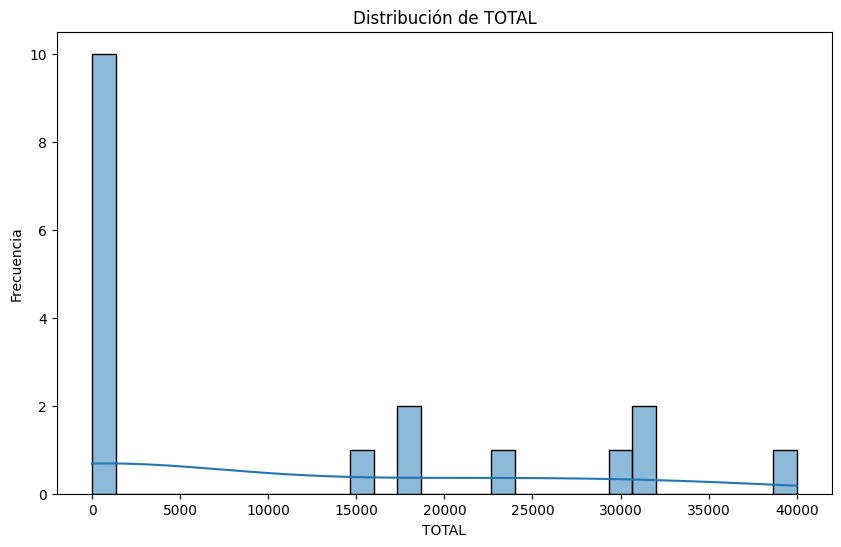

In [ ]:
# Distribución de la columna 'TOTAL'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['TOTAL'], bins=30, kde=True)
plt.title('Distribución de TOTAL')
plt.xlabel('TOTAL')
plt.ylabel('Frecuencia')
plt.show()

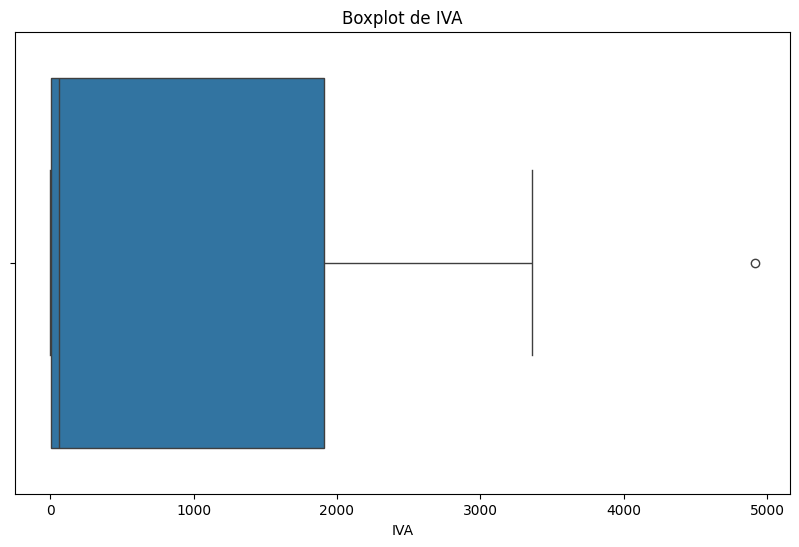

In [ ]:
# Verificación de valores atípicos (outliers) en 'IVA'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['IVA'])
plt.title('Boxplot de IVA')
plt.show()

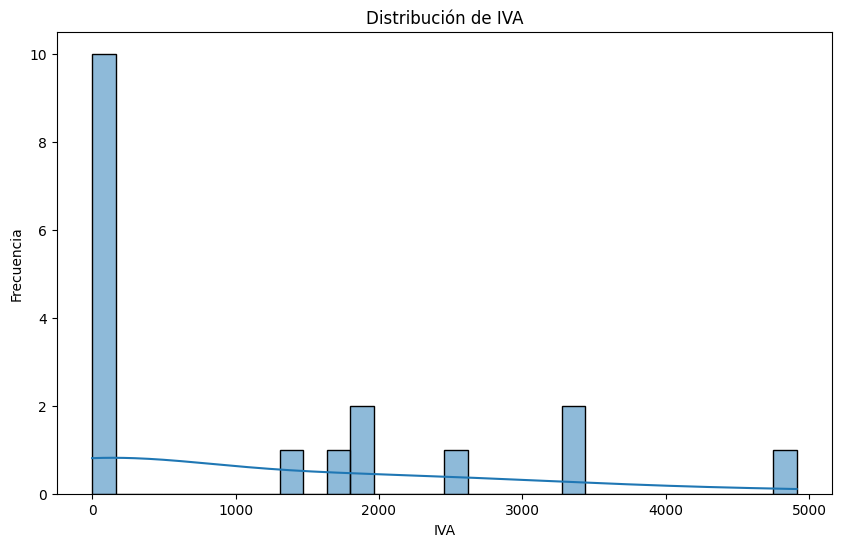

In [ ]:
# Distribución del 'IVA'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['IVA'], bins=30, kde=True)
plt.title('Distribución de IVA')
plt.xlabel('IVA')
plt.ylabel('Frecuencia')
plt.show()

MEDIDAS DE TENDENCIA CENTRAL PARA LAS VARIABLES NUMÉRICAS

TOTAL, valores por monto total de factura, se observa que la curtosis es -1.0, donde existen valores grandes que llevan la variable hacia la derecha, es decir, los totales de una factura completa ejercen mayor influencia que los totales de las "incompletas", éstas últimas son valores menores a 1000, y "ensucian" los datos.

In [ ]:
import pandas as pd
from scipy import stats

media = df_cleaned['TOTAL'].mean()
#moda = df_cleaned['TOTAL'].mode(), no existe moda, todos los valores son diferentes
mediana = df_cleaned['TOTAL'].median()
asimetria = df_cleaned['TOTAL'].skew()
curtosis = df_cleaned['TOTAL'].kurtosis()
minimo = df_cleaned['TOTAL'].min()
maximo = df_cleaned['TOTAL'].max()
print(f"La media del total es: {media}")
#print(f"La moda del total es: {moda}")
print(f"La mediana del total es: {mediana}")
print(f"La asimetria del total es: {asimetria}")
print(f"La curtosis del total es: {curtosis}")
print(f"El mínimo del total es: {minimo}")
print(f"El máximo del total es: {maximo}")

La media del total es: 11583.749444444444
La mediana del total es: 517.35
La asimetria del total es: 0.720092686407276
La curtosis del total es: -1.0624973017509207
El mínimo del total es: 0.99
El máximo del total es: 39999.0


SUBTOTAL, de similar comportamiento que el TOTAL, las facturas "completas" se ven "ensuciadas" por las "incompletas", los valores extremos ejercen alta influencia en el data set, y el 50% de ellos son menores a 500, lo que hace que la dispersión cause ruido.  

In [ ]:
media = df_cleaned['SUBTOTAL'].mean()
#moda = df_cleaned['SUBTOTAL'].mode(), , no existe moda, todos los valores son diferentes
mediana = df_cleaned['SUBTOTAL'].median()
asimetria = df_cleaned['SUBTOTAL'].skew()
curtosis = df_cleaned['SUBTOTAL'].kurtosis()
minimo = df_cleaned['SUBTOTAL'].min()
maximo = df_cleaned['SUBTOTAL'].max()
print(f"La media del subtotal es: {media}")
#print(f"La moda del subtotal es: {moda}")
print(f"La mediana del subtotal es: {mediana}")
print(f"La asimetria del subtotal es: {asimetria}")
print(f"La curtosis del subtotal es: {curtosis}")
print(f"El mínimo del subtotal es: {minimo}")
print(f"El máximo del subtotal es: {maximo}")

La media del subtotal es: 10233.394999999999
La mediana del subtotal es: 456.575
La asimetria del subtotal es: 0.7055597692783853
La curtosis del subtotal es: -1.0960685536176165
El mínimo del subtotal es: 0.88
El máximo del subtotal es: 35086.84


Debido a que los valores son menores que sus avriables predecesoras, el IVA experimenta una concentración de valores menores a los USD 100, tan así es que el 50% es menor que USD 61.  

In [ ]:
media = df_cleaned['IVA'].mean()
#moda = df_cleaned['IVA'].mode(), , no existe moda, todos los valores son diferentes
mediana = df_cleaned['IVA'].median()
asimetria = df_cleaned['IVA'].skew()
curtosis = df_cleaned['IVA'].kurtosis()
minimo = df_cleaned['IVA'].min()
maximo = df_cleaned['IVA'].max()
print(f"La media del IVA es: {media}")
#print(f"La moda del IVA es: {moda}")
print(f"La mediana del IVA es: {mediana}")
print(f"La asimetria del IVA es: {asimetria}")
print(f"La curtosis del IVA es: {curtosis}")
print(f"El mínimo del IVA es: {minimo}")
print(f"El máximo del IVA es: {maximo}")

La media del IVA es: 1169.4022222222222
La mediana del IVA es: 60.775
La asimetria del IVA es: 1.1187777270727561
La curtosis del IVA es: 0.38720583315226786
El mínimo del IVA es: 0.0
El máximo del IVA es: 4912.16


Avanzamos con las variables categóricas
Se realizó una revisión de la distribución de  MODELO, MOTOR, RAMV_CPN, VIN_CHASIS, pero todos tenías valores distintos entonces, no era necesario un análisis de distribución.

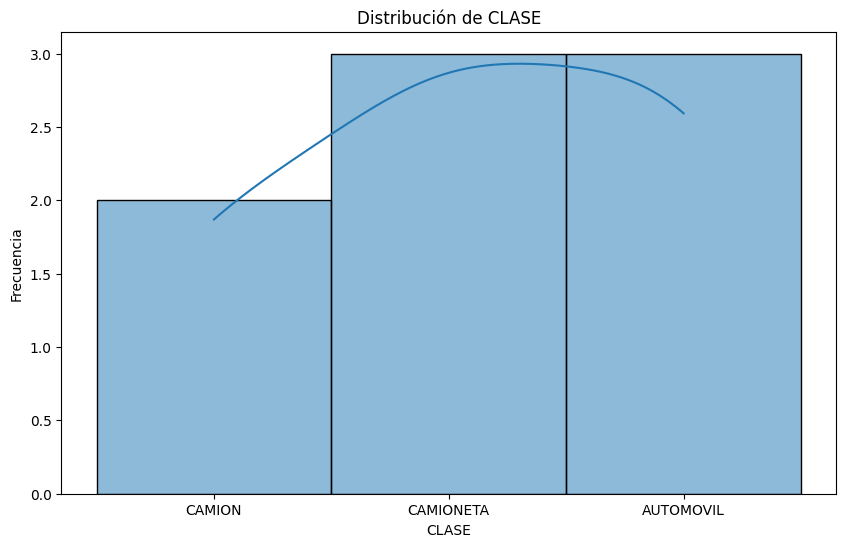

In [ ]:
# Distribución de la columna 'CLASE'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['CLASE'], bins=30, kde=True)
plt.title('Distribución de CLASE')
plt.xlabel('CLASE')
plt.ylabel('Frecuencia')
plt.show()



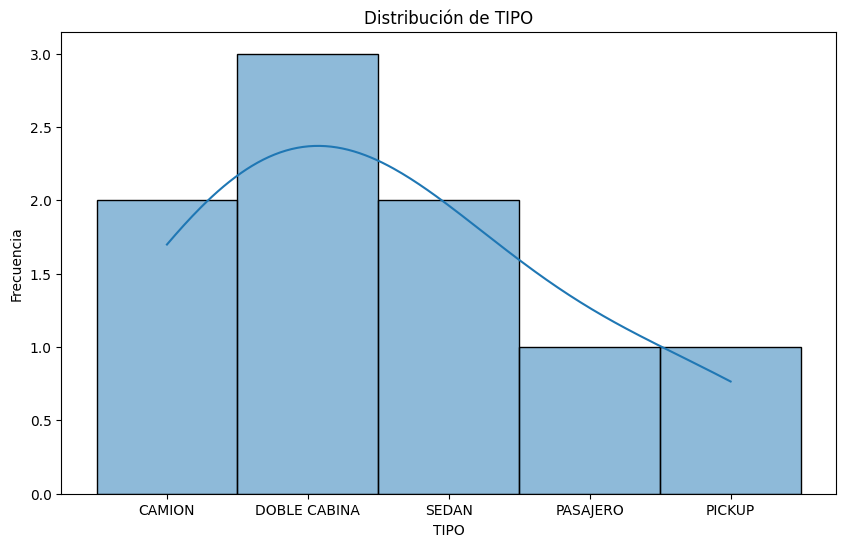

In [ ]:
# Distribución de la columna 'TIPO'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['TIPO'], bins=30, kde=True)
plt.title('Distribución de TIPO')
plt.xlabel('TIPO')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la camioneta doble cabina, es el vehículo más adquirido, en esta revisión.

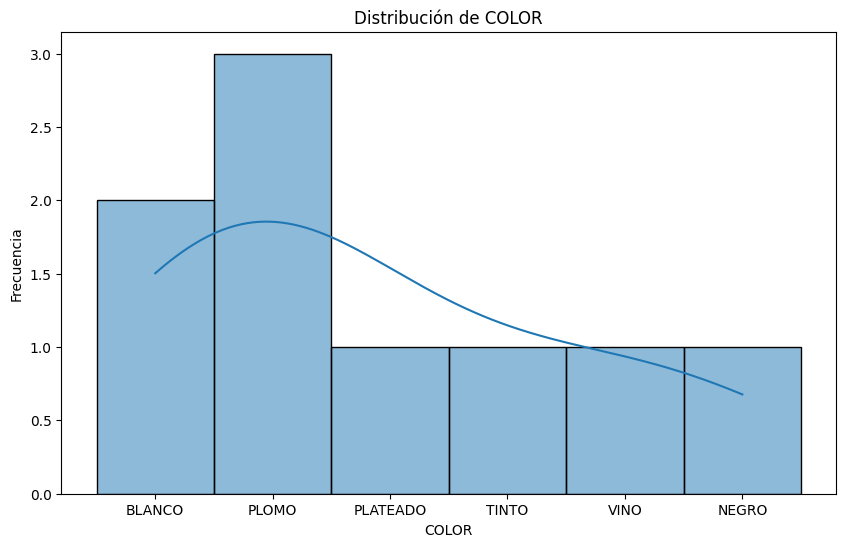

In [ ]:
# Distribución de la columna 'COLOR'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['COLOR'], bins=30, kde=True)
plt.title('Distribución de COLOR')
plt.xlabel('COLOR')
plt.ylabel('Frecuencia')
plt.show()

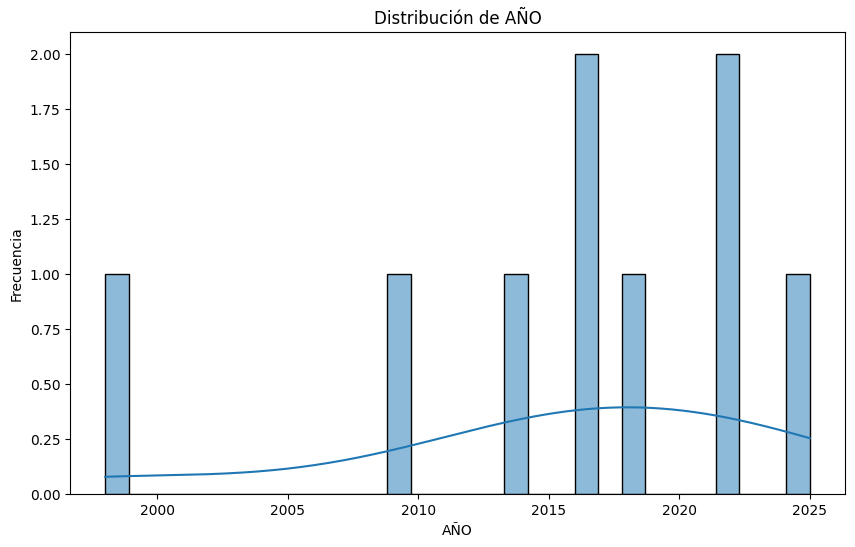

In [ ]:
# Distribución de la columna 'AÑO'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['AÑO'], bins=30, kde=True)
plt.title('Distribución de AÑO')
plt.xlabel('AÑO')
plt.ylabel('Frecuencia')
plt.show()

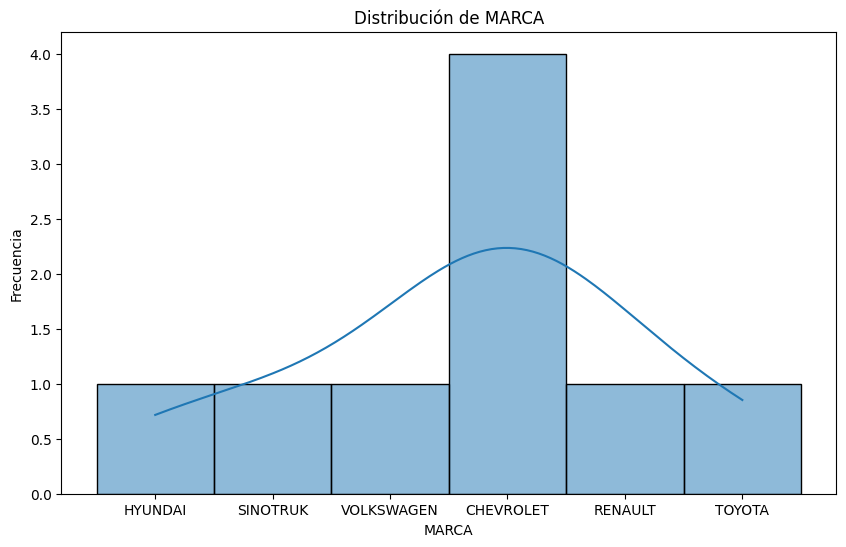

In [ ]:
# Distribución de la columna 'MARCA'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['MARCA'], bins=30, kde=True)
plt.title('Distribución de MARCA')
plt.xlabel('MARCA')
plt.ylabel('Frecuencia')
plt.show()

La marca más adquirida es Chevvrolet, dato interesante, considerando que tamién existe una ligera concentración en CONCESIONARIA, por lo que el origen debe estar altamente relacionado.

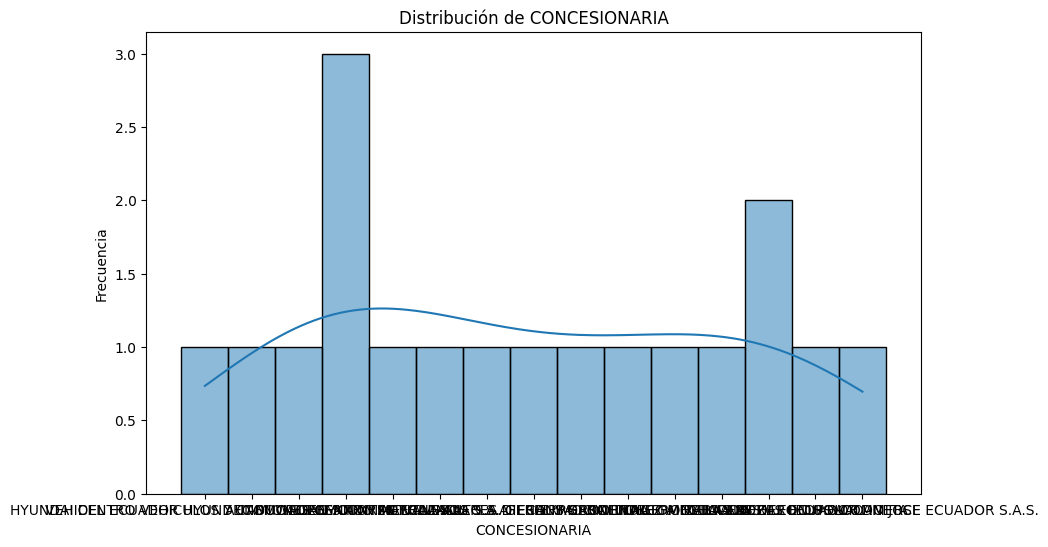

In [ ]:
# Distribución de la columna 'CONCESIONARIA'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['CONCESIONARIA'], bins=30, kde=True)
plt.title('Distribución de CONCESIONARIA')
plt.xlabel('CONCESIONARIA')
plt.ylabel('Frecuencia')
plt.show()

3. ANÁLISIS BIVARIADO ENTRE VARIABLES

MONTO MÁS ALTO POR MARCA DE VEHÍCULO


Monto por Marca de vehículo:
MARCA
VOLKSWAGEN    39999.00
HYUNDAI       30400.00
CHEVROLET     24013.25
Name: TOTAL, dtype: float64


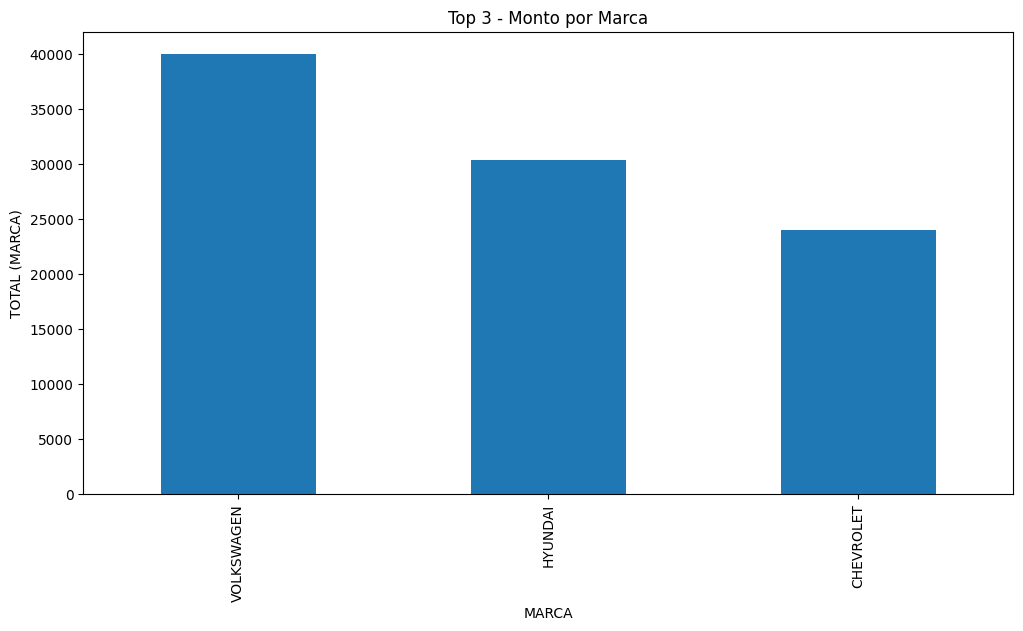

In [ ]:
# Relación entre 'MARCA' y 'TOTAL' (Monto canelado por marca de vehículo)
mean_pay_by_job = df_cleaned.groupby('MARCA')['TOTAL'].mean().sort_values(ascending=False)
print("\nMonto por Marca de vehículo:")
print(mean_pay_by_job.head(3))  # Mostrar los 3 vehículos con costo más alto

# Visualización del monto por Marca (top 3)
plt.figure(figsize=(12,6))
mean_pay_by_job.head(3).plot(kind='bar')
plt.title('Top 3 - Monto por Marca')
plt.ylabel('TOTAL (MARCA)')
plt.xlabel('MARCA')
plt.show()


CANTIDAD DE CLASE POR TIPO DE VEHÍCULO


Top 3 tipos de vehículos más comunes:
TIPO
DOBLE CABINA    3
CAMION          2
SEDAN           2
Name: count, dtype: int64


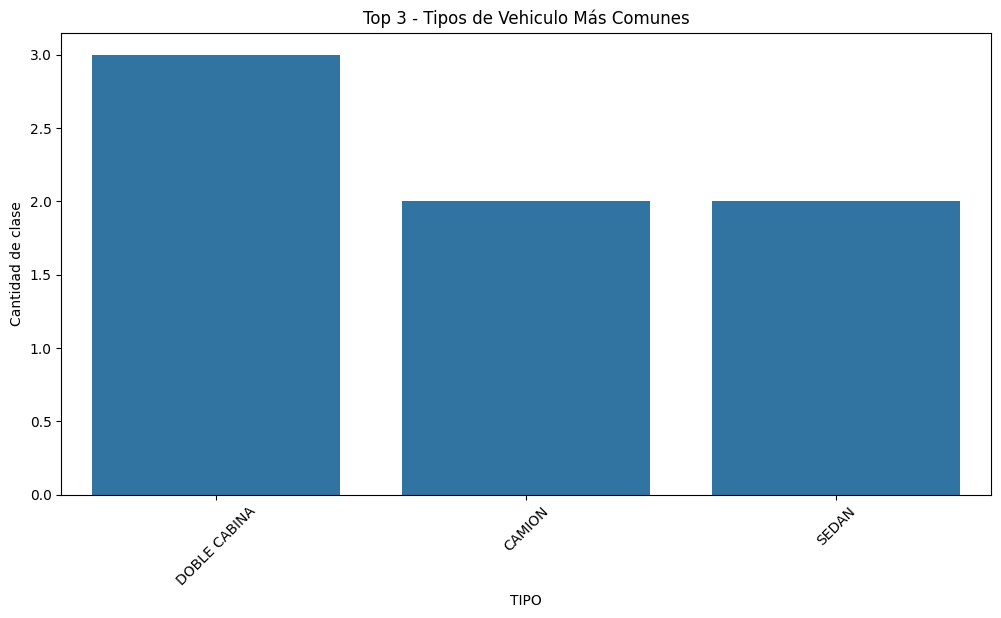

In [ ]:
# Análisis por categoría: Contar la cantidad de CLASE por TIPO
job_count = df_cleaned['TIPO'].value_counts().head(3)
print("\nTop 3 tipos de vehículos más comunes:")
print(job_count)
# Visualización de los tipos de vehículos más comunes
plt.figure(figsize=(12,6))
sns.barplot(x=job_count.index, y=job_count.values)
plt.title('Top 3 - Tipos de Vehiculo Más Comunes')
plt.ylabel('Cantidad de clase')
plt.xlabel('TIPO')
plt.xticks(rotation=45)
plt.show()

IVA MÁS ALTO POR TIPO DE VEHÍCULO


TIPOS con IVA mayor a 3000: 3
           TIPO      IVA
3  DOBLE CABINA  4912.16
4  DOBLE CABINA  3360.43
8  DOBLE CABINA  3321.32


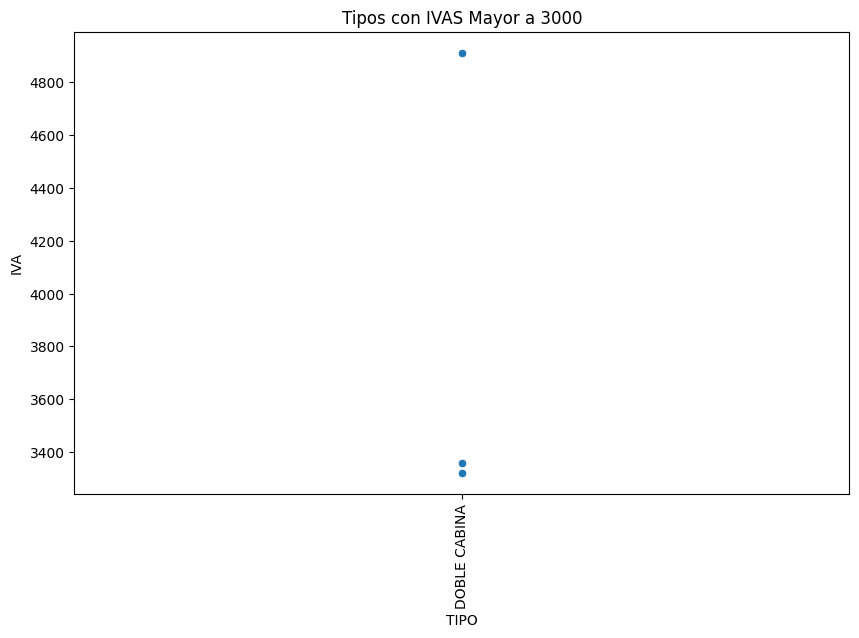

In [ ]:
# Filtrar los tipos con el IVA máS alto
high_salary_jobs = df_cleaned[df_cleaned['IVA'] > 3000]
print(f"\nTIPOS con IVA mayor a 3000: {high_salary_jobs.shape[0]}")
print(high_salary_jobs[['TIPO', 'IVA']])

# Visualización de los tipos con los IVAS más altos
plt.figure(figsize=(10,6))
sns.scatterplot(x=high_salary_jobs['TIPO'], y=high_salary_jobs['IVA'])
plt.title('Tipos con IVAS Mayor a 3000')
plt.ylabel('IVA')
plt.xlabel('TIPO')
plt.xticks(rotation=90)
plt.show()

4. ANÁLISIS MULTIVARIADO
MAPA DE CALOR DE CORRELACIONES

Como se preveía, las variables TOTAL, SUBTOTAL E IVA, se encuentran altamente correlacionadas, puesto que no son variables independientes, si no que se obtienen a partir de una de ellas (SUBTOTAL).

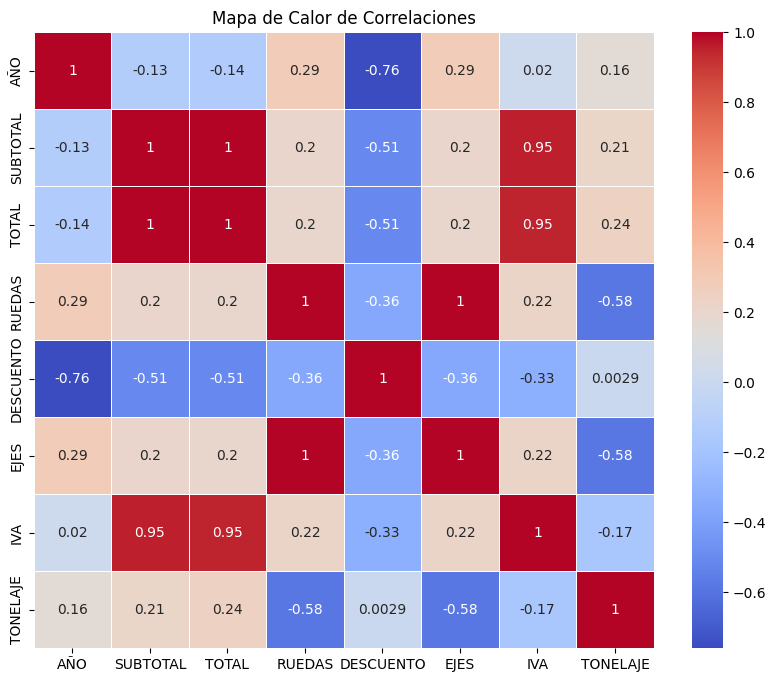

In [ ]:
# Filtrar solo las columnas numéricas
numerical_df = df_cleaned.select_dtypes(include=[np.number])

# Análisis de correlaciones entre variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

5. ANÁLISIS DE OUTLIERS
Realizado en la sección 2, para las variables numéricas

6. CONCLUSIONES E INSIGHTS

- Variables con relevancia para el modelo como: VIN_CHASIS, AÑO, CLASE, MOTOR,
MARCA, mantienen valores nulos que superan el 50% del total de los datos, una vez que se desarrolle la etapa de extracción y pueda obtenerse la información desde las fuentes originales, debería ser posible completar o enriquecer estas variables reduciendo la tasa de ausencia.
- El dataset con apenas 19 datos resulta insuficiente, para realizar imputaciones de datos faltantes, dentro de los supuestos de imputación, éstos no deben superar el 10% de los datos reales.
- Dado que los datos etiquetados como "Incompletos" corresponden a valores monetarios considerablemente menores, por tratarse de Ventas de repuestos, no representan un aporte significativo. Esto antecedente evidencia la necesidad de establecer un monto mínimo como requisito para que una transacción ingrese al proceso de VeriFactura.
   

